In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
# Create the input data with values of -1 or 1

# Number of samples
n_samples = 10

# Number of features
n_features = 2

# Create random data
np.random.seed(42)
X = np.random.choice([-1, 1], size=(n_samples, n_features))

# Compute the sum of the features for each sample
sums = np.sum(X, axis=1)

In [180]:
# Create the targets that are either -1 or 1 if sum of features is contained in a interval

# Create the lower and upper bounds for the interval of the sum of features
lower_bound = -2
upper_bound = -2

# Check if interval is valid
if lower_bound > upper_bound:
    raise ValueError("Lower bound must be smaller than upper bound!")
elif lower_bound < -n_features or upper_bound > n_features:
    raise ValueError("Lower bound and upper bound must be smaller than the number of features!")

# Create the targets
y = np.where((sums >= lower_bound) & (sums <= upper_bound), 1, -1)

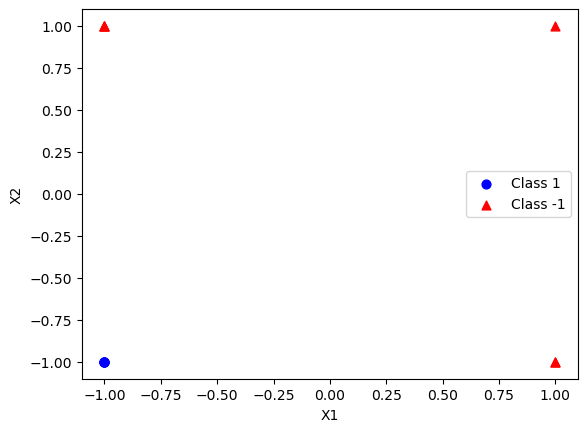

In [181]:
# Viewing the data in a scatter plot
fig, ax = plt.subplots()

# Create a scatter plot of the data
scatter1 = ax.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='o', s=40)
scatter2 = ax.scatter(X[y==-1, 0], X[y==-1, 1], c='red', marker='^', s=40)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Create a legend for the scatter plot
ax.legend([scatter1, scatter2], ['Class 1', 'Class -1'])

plt.show()

In [182]:
class Perceptron():
    def __init__(self, n_features, n_classes):
        # Initialize weights and bias to zeros
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

    def predict(self, x):
        # Compute the linear combination of the input and weights
        z = np.matmul(self.weights, x) + self.bias

        # Predict the class
        y_hat = np.argmax(z)

        return y_hat
    
    def train_epoch(self, X, y, learning_rate = 0.01):
        for xi, yi in zip(X, y):
            # Compute the prediction and error
            y_hat = self.predict(xi)
            
            # Check if the prediction is different from the true label
            if y_hat != yi:
                # Update the weights and bias
                self.weights[yi] += learning_rate * xi
                self.weights[y_hat] -= learning_rate * xi
                
                self.bias[yi] += learning_rate
                self.bias[y_hat] -= learning_rate

        return self.weights, self.bias
    
    def accuracy(self, X, y):
        # Compute the number of accurate predictions
        accuracy = 0
        for xi, yi in zip(X, y):
            if self.predict(xi) == yi:
                accuracy += 1

        return accuracy / len(X)

In [183]:
def plot_separation_line(X, y, weights_1 = None, bias_1 = None, weights_2 = None, bias_2 = None, margin = False):
    # Viewing the data in a scatter plot
    fig, ax = plt.subplots()

    # Create a scatter plot of the data
    scatter1 = ax.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='o', s=40)
    scatter2 = ax.scatter(X[y==-1, 0], X[y==-1, 1], c='red', marker='^', s=40)

    # Compute the x values for the separation lines
    x_values = np.linspace(X.min(), X.max())

    # Set the axis labels
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    # Create a legend for the scatter plot
    ax.legend([scatter1, scatter2], ['Class 1', 'Class -1'])

    if weights_1 is not None and bias_1 is not None:
        # Compute the y values for the separation lines
        y_values_1 = (-weights_1[0] / weights_1[1]) * x_values - bias_1 / weights_1[1]

        # Plot the separation line
        ax.plot(x_values, y_values_1, 'black')

        if margin:
            # Compute the y values for the lower and upper bound of the margin
            y_values_1_l = (-weights_1[0] / weights_1[1]) * x_values - (bias_1 - 1) / weights_1[1]
            y_values_1_u = (-weights_1[0] / weights_1[1]) * x_values - (bias_1 + 1) / weights_1[1]

            # Plot the lower and upper bound of the margin
            ax.plot(x_values, y_values_1_l, 'orange', linestyle='dashed')
            ax.plot(x_values, y_values_1_u, 'orange', linestyle='dashed')

    if weights_2 is not None and bias_2 is not None:
        # Compute the y values for the separation lines
        y_values_2 = (-weights_2[0] / weights_2[1]) * x_values - bias_2 / weights_2[1]

        # Plot the separation line
        ax.plot(x_values, y_values_2, 'black')

        if margin:
            # Compute the y values for the lower and upper bound of the margin
            y_values_2_l = (-weights_2[0] / weights_2[1]) * x_values - (bias_2 - 1) / weights_2[1]
            y_values_2_u = (-weights_2[0] / weights_2[1]) * x_values - (bias_2 + 1) / weights_2[1]

            # Plot the lower and upper bound of the margin
            ax.plot(x_values, y_values_2_l, 'orange', linestyle='dashed')
            ax.plot(x_values, y_values_2_u, 'orange', linestyle='dashed')
    
    plt.show()

Epoch: 1, Accuracy: 0.4


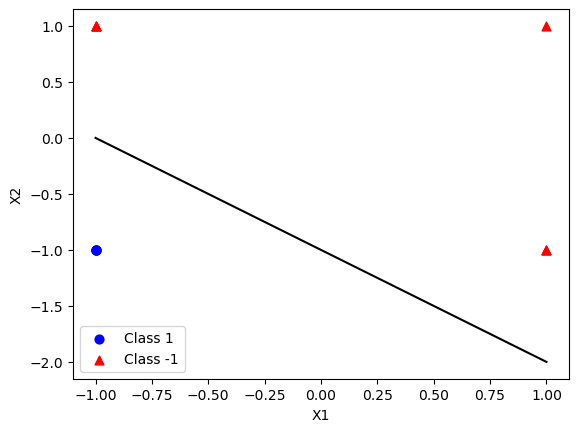

Epoch: 2, Accuracy: 0.4


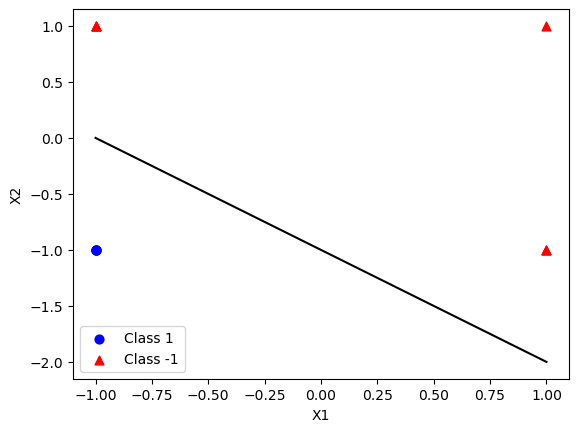

Epoch: 3, Accuracy: 0.4


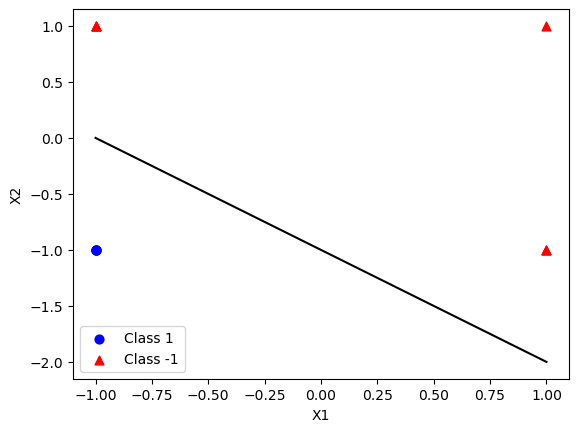

Epoch: 4, Accuracy: 0.4


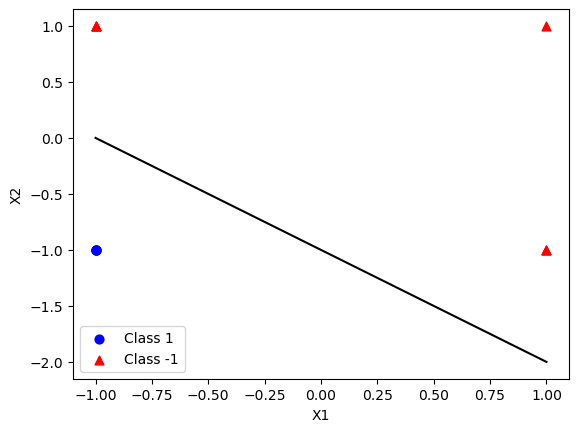

Epoch: 5, Accuracy: 0.4


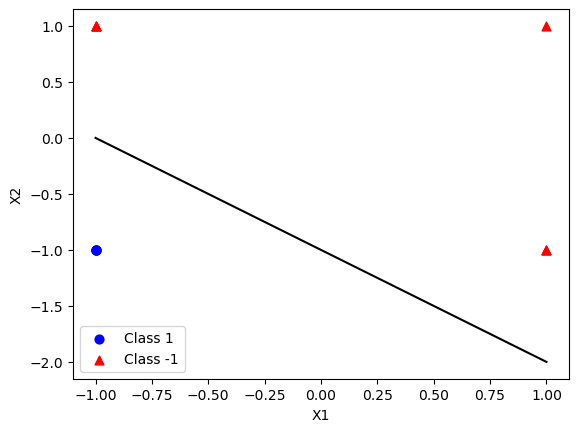

Weights: 
 [[ 0.01  0.01]
 [-0.01 -0.01]]
Bias: 
 [ 0.01 -0.01]


In [184]:
# Define the number of epochs
n_epochs = 5

# Create the perceptron
perceptron = Perceptron(n_features=2, n_classes=2)

# Assign the class 0 to the value -1 of y 
y_new = np.where(y == -1, 0, y)

# Train the perceptron
for epoch in range(n_epochs):
    # Update the weights and bias
    weights, bias = perceptron.train_epoch(X, y_new)

    # Compute the accuracy of the model
    accuracy = perceptron.accuracy(X, y)
    
    print('Epoch: {}, Accuracy: {}'.format(epoch + 1, accuracy))
    plot_separation_line(X, y, weights[0], bias[0])

print('Weights: \n {}'.format(weights))
print('Bias: \n {}'.format(bias))

Margin for the lower bound: 1.41
Margin for the upper bound: 1.41
Accuracy: 1.0


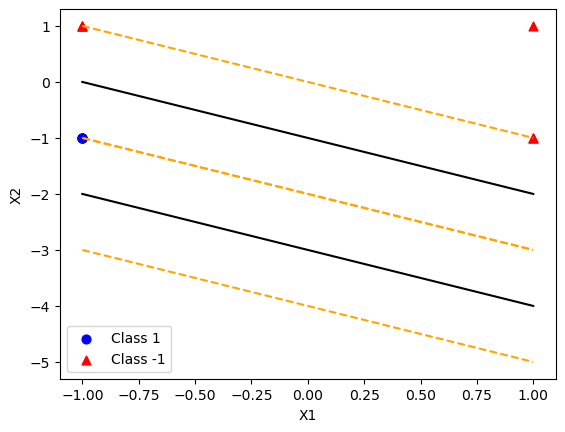

In [185]:
## Create the MLP with sign activation function

# Create the weights for the lower bound of the interval
weights_1 = np.ones(n_features)
# bias_1 = -lower_bound

# Create the weights for the upper bound of the interval
weights_2 = - np.ones(n_features) 
# bias_2 = upper_bound

# Compute the bias for the lower and upper bound if the number of features is even
if n_features % 2 == 0:
    if lower_bound % 2 == 0:
        bias_1 = 1 - lower_bound
    else:
        bias_1 = - lower_bound

    if upper_bound % 2 == 0:
        bias_2 = 1 + upper_bound
    else:
        bias_2 = upper_bound

# Compute the bias for the lower and upper bound if the number of features is odd
if n_features % 2 == 1:
    if lower_bound % 2 == 1:
        bias_1 = 1 - lower_bound
    else:
        bias_1 = - lower_bound

    if upper_bound % 2 == 1:
        bias_2 = 1 + upper_bound
    else:
        bias_2 = upper_bound

# Compute the margin for the lower bound
margin_1 = 2 / np.linalg.norm(weights_1)

# Compute the margin for the upper bound
margin_2 = 2 / np.linalg.norm(weights_2)

print('Margin for the lower bound: {:.2f}'.format(margin_1))
print('Margin for the upper bound: {:.2f}'.format(margin_2))

# Compute the hidden layers pre-activations
z_1 = np.matmul(X, weights_1) + bias_1
z_2 = np.matmul(X, weights_2) + bias_2

# Compute the hidden layers activations
h_1 = np.sign(z_1)
h_2 = np.sign(z_2)

# Compute the output pre-activations
z = h_1 + h_2 - 2

# Compute the output activations given that the output is either 1 or -1 if the pre-activation is zero or not
y_hat = np.where(z == 0, 1, -1)

print('Accuracy: {}'.format(np.sum(y_hat == y) / len(y)))

# Plot the separation lines
plot_separation_line(X, y, weights_1, bias_1, weights_2, bias_2, margin=True)

Margin for the lower bound: 1.41
Margin for the upper bound: 1.41
Accuracy: 1.0


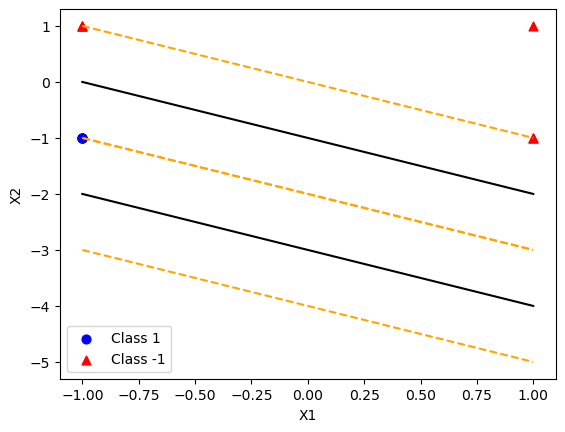

In [186]:
## Create the MLP with ReLU activation function

# Create the weights for the lower bound of the interval
weights_1 = - np.ones(n_features)
# bias_1 = -lower_bound

# Create the weights for the upper bound of the interval
weights_2 = np.ones(n_features) 
# bias_2 = upper_bound

# Compute the bias for the lower and upper bound if the number of features is even
if n_features % 2 == 0:
    if lower_bound % 2 == 0:
        bias_1 = lower_bound - 1
    else:
        bias_1 = lower_bound

    if upper_bound % 2 == 0:
        bias_2 = - (1 + upper_bound)
    else:
        bias_2 = - upper_bound

# Compute the bias for the lower and upper bound if the number of features is odd
if n_features % 2 == 1:
    if lower_bound % 2 == 1:
        bias_1 = lower_bound - 1
    else:
        bias_1 = lower_bound

    if upper_bound % 2 == 1:
        bias_2 = - (1 + upper_bound)
    else:
        bias_2 = - upper_bound

# Compute the margin for the lower bound
margin_1 = 2 / np.linalg.norm(weights_1)

# Compute the margin for the upper bound
margin_2 = 2 / np.linalg.norm(weights_2)

print('Margin for the lower bound: {:.2f}'.format(margin_1))
print('Margin for the upper bound: {:.2f}'.format(margin_2))

# Compute the hidden layers pre-activations
z_1 = np.matmul(X, weights_1) + bias_1
z_2 = np.matmul(X, weights_2) + bias_2

# Compute the hidden layers activations
h_1 = np.maximum(z_1, 0)
h_2 = np.maximum(z_2, 0)

# Compute the output pre-activations
z = h_1 + h_2

# Compute the output activations given that the output is either 1 or -1 if the pre-activation is zero or not
y_hat = np.where(z == 0, 1, -1)

print('Accuracy: {}'.format(np.sum(y_hat == y) / len(y)))

# Plot the separation lines
plot_separation_line(X, y, weights_1, bias_1, weights_2, bias_2, margin=True)

In [187]:
# Build the MLP model

class MLP():
    """
    A Multi-Layer Perceptron class for binary classification.

    Parameters
    ----------
    n_features : int
        The number of features (i.e. the dimensionality) of the data.
    n_layers : int
        The number of layers of the network.
    hidden_size : int
        The number of neurons in each hidden layer.

    Attributes
    ----------
    error_ : list
        The list of errors during training.
    """

    def __init__(self, n_features, n_layers = 1, hidden_size = 2, activation = "sign", loss_function = "sse"):
        # Initialize the parameters
        self.n_layers = n_layers
        self.weights = []
        self.biases = []

        # Initialize the weights and biases of the network
        self.weights.append(np.random.randn(hidden_size, n_features))
        self.biases.append(np.zeros((hidden_size, 1)))
        for _ in range(n_layers - 1):
            self.weights.append(np.random.randn(hidden_size, hidden_size))
            self.biases.append(np.zeros((hidden_size, 1)))
        self.weights.append(np.random.randn(1, hidden_size))
        self.biases.append(np.zeros((1, 1)))

        # Initialize the activation function
        if activation == "relu":
            self.activation = self.relu
            self.activation_derivative = self.relu_derivative
        elif activation == "sign":
            self.activation = self.sign
            self.activation_derivative = self.sign_derivative
        else:
            raise ValueError("Activation function not supported!")
        
        # Initialize the loss function
        if loss_function == "mse":
            self.loss_function = self.mse
            self.loss_derivative = self.mse_derivative
        elif loss_function == "sse":
            self.loss_function = self.sse
            self.loss_derivative = self.sse_derivative
        elif loss_function == "cross_entropy":
            self.loss_function = self.cross_entropy
            self.loss_derivative = self.cross_entropy_derivative
        else:
            raise ValueError("Loss function not supported!")
    
    def mse(self, y, y_hat):
        """The mean squared error loss function."""
        return np.mean((y - y_hat) ** 2)
    
    def mse_derivative(self, y, y_hat):
        """The derivative of the mean squared error loss function."""
        return 2 * (y_hat - y) / y.size
    
    def sse(self, y, y_hat):
        """The sum squared error loss function."""
        return np.sum((y - y_hat) ** 2)
    
    def sse_derivative(self, y, y_hat):
        """The derivative of the sum squared error loss function."""
        return 2 * (y_hat - y)
    
    def cross_entropy(self, y, y_hat):
        """The cross-entropy loss function."""
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def cross_entropy_derivative(self, y, y_hat):
        """The derivative of the cross-entropy loss function."""
        return (y_hat - y) / (y_hat * (1 - y_hat) * y.size)

    def relu(self, z):
        """The ReLU activation function."""
        return np.maximum(z, 0)

    def relu_derivative(self, z):
        """The derivative of the ReLU activation function."""
        return np.where(z <= 0, 0, 1)
    
    def sign(self, z):
        """The sign activation function."""
        return np.sign(z)
    
    def sign_derivative(self, **kwargs):
        """The derivative of the sign activation function."""
        return 1

    def forward(self, X):
        # Initialize the list of hidden layers
        hiddens = []

        # Propagate inputs through network
        h = X.T
        for i in range(self.n_layers):
            z = self.weights[i] @ h + self.biases[i]
            h = self.activation(z)
            hiddens.append(h)
        
        # Compute the output
        output = self.weights[-1] @ h + self.biases[-1]
        
        return output, hiddens
    
    def backward(self, X, y, output, hiddens):
        # Initialize the list of errors
        errors = []

        # Compute the error of the output layer
        error = self.loss_derivative(y, output)
        errors.append(error)

        # Compute the errors of the hidden layers
        for i in reversed(range(self.n_layers)):
            error = self.weights[i + 1].T @ error * self.activation_derivative(self.weights[i] @ hiddens[i] + self.biases[i])
            errors.append(error)

        # Reverse the list of errors
        errors.reverse()

        # Compute the gradients of the weights and biases
        dW = []
        db = []
        for i in range(self.n_layers + 1):
            dW.append(errors[i] @ hiddens[i].T)
            db.append(np.sum(errors[i], axis=1, keepdims=True))

        return dW, db

    def train_epoch(self, X, y, learning_rate = 0.01):
        # Initialize the list of errors
        self.error_ = []

        # Compute the output and hidden layers
        output, hiddens = self.forward(X)

        # Compute the gradients
        dW, db = self.backward(X, y, output, hiddens)

        # Update the weights and biases
        for i in range(self.n_layers + 1):
            self.weights[i] -= learning_rate * dW[i]
            self.biases[i] -= learning_rate * db[i]

        # Compute the error
        error = self.loss_function(y, output)
        self.error_.append(error)

        return self.weights, self.biases